# Simple regression - Salary Data

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("D:\DS Assignments\Assignment 4\Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#years of experience is independent variable and salary is dependent variable

In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\91931\AppData\Local\Temp\ipykernel_16896\706534755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

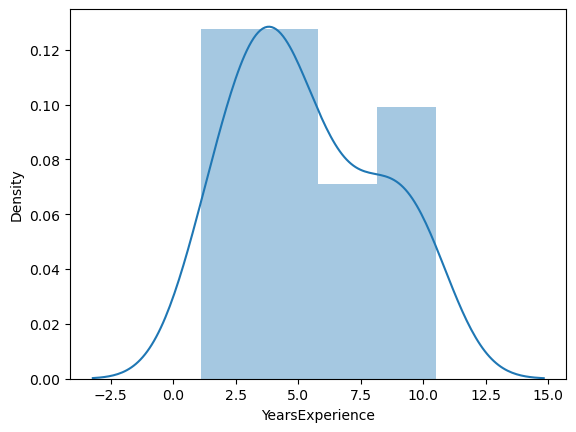

In [6]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

C:\Users\91931\AppData\Local\Temp\ipykernel_16896\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

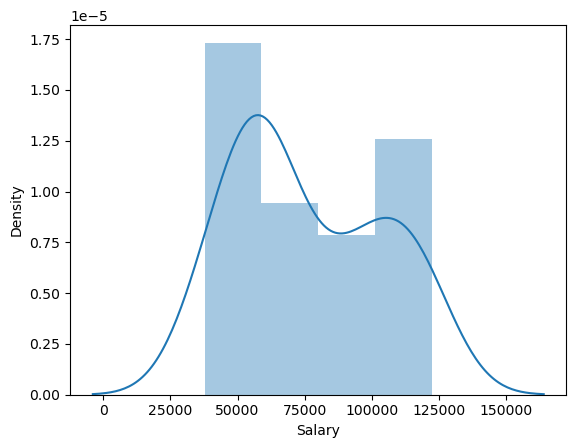

In [7]:
sns.distplot(data['Salary'])

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("Salary ~ YearsExperience", data=data).fit()

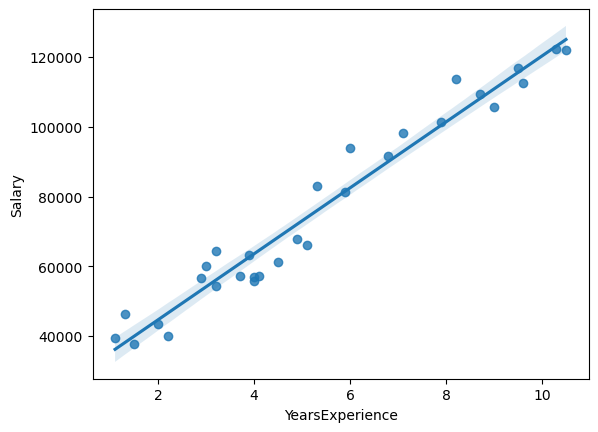

In [9]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [10]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
# R squared values 
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#Conclusion: The r-squared value and r-squared_adj value are greater than .85 which means the model is accurate enough to be used to predict salary data using years of experience.

### lets try and check if transforming data improves the model accuracy

In [6]:
#Rename column names as YearsExperience= X and Salary = Y
data = data.rename(columns={'YearsExperience': 'X', 'Salary': 'Y'})

In [14]:
data.head()

,X,Y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
#log transformation
import numpy as np
data['log_X'] = np.log(data['X'])
import numpy as np
data['log_Y'] = np.log(data['Y'])

In [16]:
#square root transformation
data['sqrt_X'] = np.sqrt(data['X'])
data['sqrt_Y'] = np.sqrt(data['Y'])

In [17]:
#cube root transformation
data['cbrt_X'] = np.cbrt(data['X'])
data['cbrt_Y'] = np.cbrt(data['Y'])

In [18]:
data.head()

,X,Y,log_X,log_Y,sqrt_X,sqrt_Y,cbrt_X,cbrt_Y
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.032280,34.011242
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.091393,35.883626
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,1.144714,33.540235
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,1.259921,35.175984
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,1.300591,34.168426


In [19]:
model_log = smf.ols("log_Y ~ log_X", data=data).fit()
(model_log.rsquared, model_log.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [20]:
model_sqrt = smf.ols("sqrt_Y ~ sqrt_X", data=data).fit()
(model_sqrt.rsquared, model_sqrt.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)

In [21]:
model_cbrt = smf.ols("cbrt_Y ~ cbrt_X", data=data).fit()
(model_cbrt.rsquared, model_cbrt.rsquared_adj)

(0.9324434036761005, 0.9300306680931041)

### MinMaxScaler and StandardScaler transformation

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
cols_to_normalize = ['X', 'Y']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# transform the data
data[['X_norm', 'Y_norm']] = scaler.fit_transform(data[cols_to_normalize])

In [8]:
data.head()

,X,Y,X_norm,Y_norm
0,1.1,39343.0,0.000000,0.019041
1,1.3,46205.0,0.021277,0.100094
2,1.5,37731.0,0.042553,0.000000
3,2.0,43525.0,0.095745,0.068438
4,2.2,39891.0,0.117021,0.025514


In [10]:
import statsmodels.formula.api as smf
model_norm = smf.ols("Y_norm ~ X_norm", data=data).fit()

In [11]:
(model_norm.rsquared, model_norm.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [12]:
# Create a StandardScaler object
scaler = StandardScaler()

# transform the data
data[['X_standardized', 'Y_standardized']] = scaler.fit_transform(data[cols_to_normalize])

In [13]:
model_standardized = smf.ols("Y_standardized ~ X_standardized", data=data).fit()
(model_standardized.rsquared, model_standardized.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Conclusion: As we can check from above results, the r-squared value for model with no transfomation is the highest. Hence, it the the best fitting simple linear regression model to predict salaries.